In [1]:
import numpy as np
import time
from numpy.linalg import norm
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Line Search Algorithms

Goal is to approximate the minimum value of $f$. Any line search algorithm chooses $x_k$ like so:

$$
x_{k+1} = x_k + \alpha_k p_k
$$

$\alpha_k$ is the step length, $p_k$ determines the algorithm.

Usually $p_k = - B_k^{-1} f_k$, where $B_k$ is a symmetric, nonsingular matrix (nonzero determinant).

For steepest descent, $B_k = I$.

For Newton's method, $B_k = \nabla^2 f(x_k)$.

For Quasi-Newton method, $B_k$ is an approximation of the Hessian.

## Step direction

Essentially, we need $f(x_{k+1}) \le f(x_k)$, which is satisfied when $p_k^T \nabla f_k < 0$. If a direction $\rho$ satisfies this condition, then $\rho_k$ is a **descent direction**.

## Step length

Given some choice of step direction $\mathbf{p}_k$, we must also determine how far we want to move in that direction, which is in general a more difficult problem. If we want to choose an *optimal* value of $\alpha_k$, we could set
$$ \alpha_k = \min_{\alpha>0} f(\mathbf{x}_k+\alpha \mathbf{p}_k) $$

Or, setting $\phi(\alpha) = f(\mathbf{x}_k + \alpha \mathbf{p}_k)$:
$$ \alpha_k = \min_{\alpha > 0} \phi(\alpha)$$


## Steepest Descent (Gradient Descent)

$$
x_{k+1} = x_k - \alpha_k \nabla f_k
$$
The simplest method uses step direction $p_k = -\nabla f_k$:

In the following example, $f(x, y) = (x + 2y - 7)^2 + (2x + y - 5)^2$

$$\nabla f(x,y) = \begin{bmatrix}
2(x + 2y - 7) + 4(2x + y - 5) \\ 4(x + 2y - 7) + 2(2x + y - 5)
\end{bmatrix}
$$

# Exact Line Search Steepest Descent

In [42]:
#description: exact line search steepest decent method
#parameters :
 #objFunc : objective function
 #gradObjFunc: gradient of objective function
 #x0 : starting point
 #tol : tolerace for stopping criteria
 #maxIter : maximum iteration for stopping criteria

def exact_steepest_decent_method(objFunc, gradObjFunc, x0, tol, maxIter):

  path = [x0]
  k = 0
  xk = x0
  pk = -gradObjFunc(x0)
  while norm(pk) > tol and k <= maxIter:
    def subproblem1D(alpha):
      return objFunc(xk + alpha * pk)
    res = minimize_scalar(subproblem1D) # scipy function to minimize objFunction w.r.t alpha
    print("Exact line search step size: {:.4f}".format(res.x))
    xk = xk + res.x * pk
    pk = -gradObjFunc(xk) # update pk
    k = k + 1
    path.append(xk)
  path = np.array(path) # convert to array

  if norm(pk) <= tol:
    print("Found the minimizer at {x} with {iter} iterations successfully,\
    gradient's norm is {nrm}.".format(x=xk,iter=k,nrm=norm(pk)))
  else:
    print("Unable to locate minimizer within maximum iterations, last\
position is at {x}, gradient's norm is {nrm}".format(x=xk,nrm=norm(pk)))

  return xk, k, path

In [43]:
def QObjFunc(x): # f
    return (x[0] + 2 * x[1] - 7) ** 2 + (2 * x[0] + x[1] - 5) ** 2
def QGradObjFunc(x): # gradient of f
    return np.array([(x[0] + 2 * x[1] - 7) * 2 + (2 * x[0] + x[1] - 5) * 4,
 (x[0] + 2 * x[1] - 7) * 4 + (2 * x[0] + x[1] - 5) * 2])


In [44]:
tic = time.perf_counter()
x0 = np.array([0., 0.])
tol = 1e-9
maxIter = 1e6
#run it
x_1, iter_1, path_1 = exact_steepest_decent_method(QObjFunc,
QGradObjFunc, x0, tol, maxIter)
toc = time.perf_counter()

print("Took {:.4f} seconds".format(toc - tic))


Exact line search step size: 0.0557
Exact line search step size: 0.4880
Exact line search step size: 0.0557
Exact line search step size: 0.4880
Exact line search step size: 0.0557
Exact line search step size: 0.4880
Exact line search step size: 0.0557
Exact line search step size: 0.4880
Exact line search step size: 0.0557
Exact line search step size: 0.4880
Exact line search step size: 0.0557
Exact line search step size: 0.4877
Exact line search step size: 0.0557
Found the minimizer at [1. 3.] with 13 iterations successfully,    gradient's norm is 2.436963899038423e-10.
Took 0.0057 seconds


# Fixed Step Steepest Descent

In [2]:
"""
@description: fixed step length steepest decent method
@parameters :
 @objFunc : objective function
 @gradObjFunc: gradient of objective function
 @alpha : the fixed step length, a.k.a. learning rate
 @x0 : starting point
 @tol : tolerace for stopping criteria
 @maxIter : maximum iteration for stopping criteria
"""
def fixed_step_steepest_decent_method(objFunc, gradObjFunc, alpha, x0, tol,
maxIter):
  path = [x0]
  k = 0
  xk = x0
  pk = -gradObjFunc(x0)
  while norm(pk) > tol and k <= maxIter:
    xk = xk + alpha * pk # alpha is fixed: alpha = 0.01
    pk = -gradObjFunc(xk)
    k = k + 1
    path.append(xk)

  path = np.array(path) # convert to array

  if norm(pk) <= tol:
     print("Found the minimizer at {x} with {iter} iterations successfully, \
gradient's norm is {nrm}.".format(x=xk,iter=k,nrm=norm(pk)))
  else:
     print("Unable to locate minimizer within maximum iterations, last \
position is at {x}, gradient's norm is {nrm}".format(x=xk,nrm=norm(pk)))

  return xk, k, path

In [46]:
alpha = 1e-2
tic = time.perf_counter()
x_2, iter_2, path_2 = fixed_step_steepest_decent_method(QObjFunc, QGradObjFunc,
alpha, x0, tol, maxIter)
toc = time.perf_counter()
print("Took {:.4f} seconds".format(toc - tic))

Found the minimizer at [1. 3.] with 1078 iterations successfully, gradient's norm is 9.845861397310912e-10.
Took 0.0218 seconds


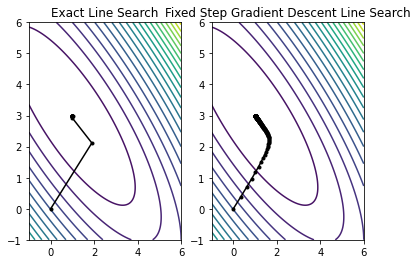

In [47]:
# additional code: contour plots for objective function
# set the region to plot on
x = np.linspace(-1, 6, 500)
y = np.linspace(-1, 6, 500)
X, Y = np.meshgrid(x, y)
# evaluate function
Z = QObjFunc([X,Y])

plt.subplot(1, 2, 1)
plt.contour(X, Y, Z, 25);
plt.title("Exact Line Search")
plt.plot(path_1[:,0],path_1[:,1],'-k', marker='.')


plt.subplot(1, 2, 2)
plt.contour(X, Y, Z, 25);
plt.title("Fixed Step Gradient Descent Line Search")
plt.plot(path_2[:,0],path_2[:,1],'-k', marker='.')

# if alpha = 0.000001 then it'll take forever to converge

In each line search:
$x_{k+1} = x_k - \alpha_k \nabla f_k$

Exact line search: $\alpha_k$ is calculated to minimize $f(x_{k+1})$. $\alpha_0 = 0.057, \alpha_1 = .04880$ etc

Fixed Step Gradient Descent: $\alpha_k = 0.01$


# Wolfe Conditions

Provides conditions for $\alpha_k$ to be good enough to ensure convergence.

* Wolfe I (Armijo condition): $\qquad f_{k+1}\le f_k+c_1\alpha_k\mathbf{p}_k^T\nabla f_k$
* Wolfe II (curvature condition): $\quad \mathbf{p}_k^T\nabla f_{k+1}\ge c_2\mathbf{p}_k^T\nabla f_k$

With $0 < c_1 < c_2 < 1$. Then this iteration will converge; $\nabla f_k \rightarrow 0$ as $k \rightarrow \infty$.


In the following example, $f(x, y) = (x + 2y - 7)^2 + (2x + y - 5)^2$

$$\nabla f(x,y) = \begin{bmatrix}
2(x + 2y - 7) + 4(2x + y - 5) \\ 4(x + 2y - 7) + 2(2x + y - 5)
\end{bmatrix}
$$

## Wolfe Condition 1

This gives an upper limit on the value that $\alpha_k$ can take.

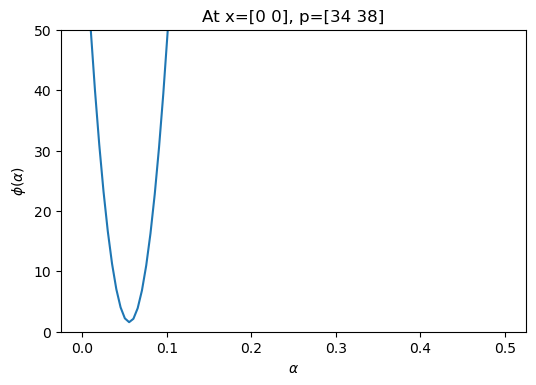

In [48]:
xk = np.array([0,0])   # Initial point ﴾0,0﴿ 
pk = -QGradObjFunc((xk[0],xk[1]))  # step direction 
# phi﴾a﴿ = f﴾x + a*p﴿ = f﴾x - a*df﴿ 
phi = lambda alpha: QObjFunc((xk[0]+alpha*pk[0],  xk[1]+alpha*pk[1])) # phi = f(x + alpha * p) 
xx = np.linspace(0,0.5,100) 
pp = phi(xx) 
plt.figure(dpi=100) 
plt.plot(xx,pp) 
plt.xlabel(r'$\alpha$') 
plt.ylabel(r'$\phi(\alpha)$') 
plt.ylim([0,50]) 
plt.title(f'At x={xk}, p={-QGradObjFunc((xk[0],xk[1]))}') 
plt.show()

This is a graph of $\alpha$ vs $\phi(\alpha) = f(x_k + \alpha p_k)$ - function value of your next step

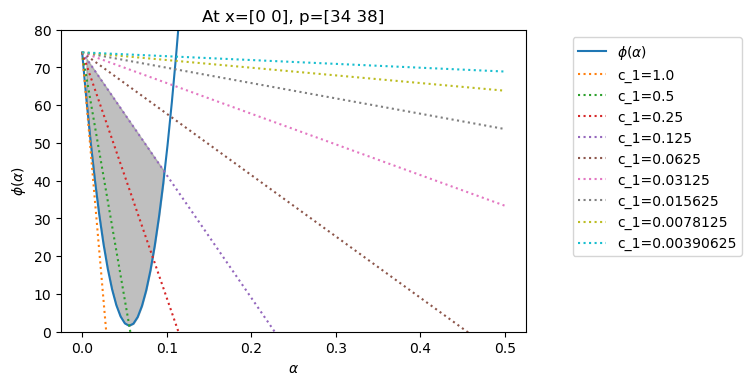

In [49]:
plt.figure(dpi=100)
plt.plot(xx,pp,label=r'$\phi(\alpha)$')
for i in range(9):
    ll = phi(0)-(1/2**i)*xx*np.dot(pk,pk) # example: phi(0) - 0.5 * x * p^T p
    plt.plot(xx,ll,':',label=f'c_1={1/2**i}')
    if i == 3:
        plt.fill_between(xx, pp, ll, where=ll>pp, color='grey', alpha=0.5)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\phi(\alpha)$')
plt.ylim([0,80])
plt.title(f'At x={xk}, p={-QGradObjFunc((xk[0],xk[1]))}')
plt.legend(loc=(1.1,.25))
plt.show()

Sufficient decrease condition: $f_{k+1}$ must be below this purple line to have decreased sufficiently. $\alpha$ can be between 0 and about 0.1.

This graph graphs $\alpha$ on x-axis and $\phi(\alpha)$ on y-axis, $\phi(\alpha) = f(x_k + \alpha * p_k)$

So given a $c_1$, choose an $\alpha$ such that $\phi(\alpha)$ lies below the line.

if $c_1 = 0.1$, then $\alpha < 0.1$

## Wolfe Condition 2

Wolfe Condition 1 is insufficient because it's satisfied for extremely small values of $\alpha$. To rule out steps that are too short, the curvature condition is introduced:
$$\quad \mathbf{p}_k^T\nabla f_{k+1}\ge c_2\mathbf{p}_k^T\nabla f_k$$

$\phi(\alpha_k) = f(\mathbf{x}_k + \alpha_k \mathbf{p}_k))$, $\phi'(\alpha_k) = \mathbf{p}_k^T \nabla f_{k+1}$

The LHS is $\phi'(\alpha_k)$, so the slope of $\phi$ at $\alpha_k$ must be greater than $c_2$ times the initial slope. Note that since $\phi'(\alpha_k)$ is negative, this means it's less steep than the previous step.

Choosing $c_2 = 0.25$: The slope is equal to that of the red line. 

In [50]:
slope = -(0.25)*np.dot(pk,pk)
print(slope)

-650.0


$\phi'(a_k)$ must be larger than -650 means $\alpha_k > 0.04$ 

$0.04 < \alpha_k < 0.1$

Without 2nd wolfe condition, you could choose $\alpha = 0.000001$.

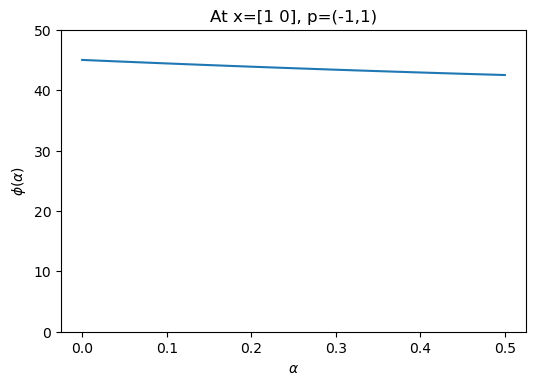

In [51]:
xk = np.array([1,0])   # Initial point ﴾0,0﴿ 
pk = (-1,1)  # step direction 
# phi﴾a﴿ = f﴾x + a*p﴿ = f﴾x - a*df﴿ 
phi = lambda alpha: QObjFunc((xk[0]+alpha*(-1),  xk[1]+alpha*(1))) # phi = f(x + alpha * p)
xx = np.linspace(0,0.5,100) 
pp = phi(xx) 
plt.figure(dpi=100) 
plt.plot(xx,pp) 
plt.xlabel(r'$\alpha$') 
plt.ylabel(r'$\phi(\alpha)$') 
plt.ylim([0,50]) 
plt.title(f'At x={xk}, p=(-1,1)') 
plt.show()

In [58]:
def QObjFunc(x): # f
    return (x[1] +  x[2]**2 ) ** 2 
def QGradObjFunc(x): # gradient of f
    return np.array([-1,1])


In [79]:
def fixed_step_steepest_decent_method(objFunc, gradObjFunc, alpha, x0, tol,
maxIter):
  path = [x0]
  k = 0
  xk = x0
  pk = gradObjFunc(x0)
  while norm(pk) > tol and k <= maxIter:
    xk = xk + alpha * pk # alpha is fixed: alpha = 0.01
    pk = gradObjFunc(xk)
    k = k + 1
    path.append(xk)

  path = np.array(path) # convert to array

  if norm(pk) <= tol:
     print("Found the minimizer at {x} with {iter} iterations successfully, \
gradient's norm is {nrm}.".format(x=xk,iter=k,nrm=norm(pk)))
  else:
     print("Unable to locate minimizer within maximum iterations, last \
position is at {x}, gradient's norm is {nrm}".format(x=xk,nrm=norm(pk)))

  return xk, k, path

In [80]:
alpha = 1e-2
x0 = np.array([1., 0.])
tol = 1e-9
maxIter = 1e6
tic = time.perf_counter()
x_2, iter_2, path_2 = fixed_step_steepest_decent_method(QObjFunc,  QGradObjFunc,
alpha, x0, tol, maxIter)
toc = time.perf_counter()
print("Took {:.4f} seconds".format(toc - tic))

Unable to locate minimizer within maximum iterations, last position is at [-9999.01000017 10000.01000017], gradient's norm is 1.4142135623730951
Took 9.7279 seconds


In [91]:
def QObjFunc(x): # f
    return (x[0] +  x[1]**2 ) ** 2 
def QGradObjFunc(x): # gradient of f
    return np.array([-1,1])

In [108]:
path = [x0]
k = 1
xk = x0
pk = QGradObjFunc(xk)
yk=xk
xk = xk + alpha * pk
alpha = 1e-7
x0 = np.array([1., 0.])
tol = 1e-9
maxIter = 1e10
while QObjFunc(yk)-QObjFunc(xk)>tol and k <= maxIter:
    yk=xk
    xk = xk + alpha * pk # alpha is fixed: alpha = 0.01
    k = k + 1
    path.append(xk)

path = np.array(path) # convert to array

if 0<QObjFunc(yk)-QObjFunc(xk)<tol:
     print("Found the minimizer at {x} with {iter} iterations successfully, \
gradient's norm is {nrm}.".format(x=xk,iter=k,nrm=norm(pk)))
else:
     print("Unable to locate minimizer within maximum iterations, last \
position is at {x}, gradient's norm is {nrm}".format(x=xk,nrm=norm(pk)))


Found the minimizer at [0.50333319 0.49666681] with 4966669 iterations successfully, gradient's norm is 1.4142135623730951.


In [43]:
def fixed_step_steepest_decent_method(objFunc, gradObjFunc, alpha, x0, tol,
maxIter):
  path = [x0]
  k = 0
  xk = x0
  pk = -gradObjFunc(x0)
  while norm(pk) > tol and k <= maxIter:
    xk = xk + alpha * pk # alpha is fixed: alpha = 0.01
    pk = -gradObjFunc(xk)
    k = k + 1
    path.append(xk)

  path = np.array(path) # convert to array

  if norm(pk) <= tol:
     print("Found the minimizer at {x} with {iter} iterations successfully, \
gradient's norm is {nrm}.".format(x=xk,iter=k,nrm=norm(pk)))
  else:
     print("Unable to locate minimizer within maximum iterations, last \
position is at {x}, gradient's norm is {nrm}".format(x=xk,nrm=norm(pk)))

  return xk, k, path

In [44]:
def QObjFunc(x): # f
    return 100*(x[1] - x[0]**2 ) ** 2 + (1- x[0]) ** 2
def QGradObjFunc(x): # gradient of f
    return np.array([400*(x[0]**3) - 400 * x[1] *x[0] + 2 * x[0] -2,
 200*x[1]-200*(x[0]**2)])


In [60]:
alpha = 2e-3
x0 = np.array([-1.2, 1])
tol = 1e-9
maxIter = 1e6
tic = time.perf_counter()
x_1, iter_1, path_1 = fixed_step_steepest_decent_method(QObjFunc, QGradObjFunc,
alpha, x0, tol, maxIter)
toc = time.perf_counter()
print("Took {:.4f} seconds".format(toc - tic))


Unable to locate minimizer within maximum iterations, last position is at [0.99758422 0.99870893], gradient's norm is 1.5820097213099982
Took 13.5696 seconds


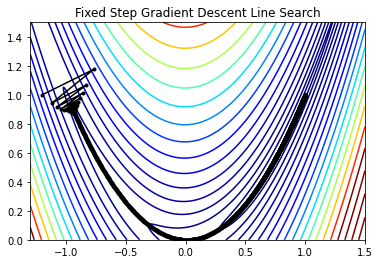

In [61]:
# additional code: contour plots for objective function
# set the region to plot on
x = np.linspace(-1.3, 1.5, 500)
y = np.linspace(0, 1.5, 500)
X, Y = np.meshgrid(x, y)
# evaluate function
Z = QObjFunc([X,Y])
plt.contour(X, Y, Z, (np.arange(10,0,-0.4)**3)[::-1], cmap='jet', vmax=250);
plt.title("Fixed Step Gradient Descent Line Search")
plt.plot(path_1[:,0],path_1[:,1],'-k', marker='.')

array([[1.2       , 1.2       ],
       [1.0844    , 1.248     ],
       [1.11549516, 1.23358467],
       ...,
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ]])